#  Title = house price prediction 

# descriptions

# data collection and importing libraries

In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt


In [2]:
#get working directory
os.getcwd()
# set option for display all features
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
#load dataset from local machine
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#train.head()

In [5]:
# train dataset info
#print(train.shape)
#print("$"*50)
#print(train.info())
#print("$"*50)
#print(train.describe())

In [6]:
# test Dataset
#print(test.shape)
#print("$"*50)
#print(test.info())
#print("$"*50)
#print(test.describe())

# data cleaning and preprocessing #

## missing value analysis ##

In [7]:
# missing value analysis for train dataset
missing_train= pd.DataFrame(train.isnull().sum()).reset_index()
missing_train = missing_train.rename(columns={"index":"variable_name",0:"missing_percentage"})
missing_train["missing_percentage"] = (missing_train["missing_percentage"]/len(train))*100
print(missing_train.sort_values(by="missing_percentage",ascending=False).head(20))

   variable_name  missing_percentage
72        PoolQC           99.520548
74   MiscFeature           96.301370
6          Alley           93.767123
73         Fence           80.753425
57   FireplaceQu           47.260274
3    LotFrontage           17.739726
59   GarageYrBlt            5.547945
64    GarageCond            5.547945
58    GarageType            5.547945
60  GarageFinish            5.547945
63    GarageQual            5.547945
35  BsmtFinType2            2.602740
32  BsmtExposure            2.602740
30      BsmtQual            2.534247
31      BsmtCond            2.534247
33  BsmtFinType1            2.534247
26    MasVnrArea            0.547945
25    MasVnrType            0.547945
42    Electrical            0.068493
0             Id            0.000000


In [8]:
# analyse missing values
missing1=["FireplaceQu","GarageCond","GarageType","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtCond","BsmtQual","BsmtFinType1","MasVnrType"]
missing2=["LotFrontage","GarageYrBlt","MasVnrArea"]

In [9]:

# drop features have more than 20% missing value
train.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1,inplace=True)

In [10]:
# fill na values with none in categorical variable
for i in missing1:
    train[i].fillna("none",inplace=True)
    

In [11]:
# fill na with o in respected numerical columns
train["GarageYrBlt"].fillna(0,inplace =True)
train["MasVnrArea"].fillna(0,inplace=True)

In [12]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [13]:
train["LotFrontage"] = train.groupby("LotConfig").transform(lambda x: x.fillna(x.mean()))

In [14]:
train["Electrical"].mode()

0    SBrkr
dtype: object

In [15]:
#fiina with mode in Electrical column
train["Electrical"].fillna("SBrkr",inplace=True)

In [16]:
# check for any other missing value in train dataset
train.isnull().sum().sum()

0

### Feature Engineering

In [17]:
#first of all select numerical features for outlier detection
numerical_features_train= train.select_dtypes(include=["float","integer"]).columns
numerical_features_train

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
names_to_convert = ['MSSubClass','OverallQual','OverallCond']

In [19]:
# convert data types of respective features
train["MSSubClass"]    = train["MSSubClass"].astype("category")
train["OverallQual"]   = train["OverallQual"].astype("category")
train["OverallCond"]   = train["OverallCond"].astype("category")

In [20]:
train["Age"]=train["YrSold"]-train["YearBuilt"]

In [21]:
# remove YearBuilt and YrSold
train.drop(["YearBuilt","YrSold"],axis=1,inplace=True)

In [22]:
train["FullBath"] = train["BsmtFullBath"] + train["FullBath"]
train["HalfBath"] = train["BsmtHalfBath"] + train["HalfBath"]

In [23]:
# remove BsmtHalfBath and BsmtFullBath
train.drop(["BsmtFullBath","BsmtHalfBath"],axis=1,inplace=True)

### outliers analysis

In [24]:
#first of all select numerical features for outlier detection
numerical_features_train= train.select_dtypes(include=["float","integer"]).columns
numerical_features_train

Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age'],
      dtype='object')

In [25]:
#plt.figure(figsize=(16,64))
#for i,j in zip(numerical_features_train,range(1,32)):
    #plt.subplot(11,3,j)
    #sns.boxplot(train[i])

In [26]:
# filter out continuos variable with outliers
cnames_with_outliers = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
                       "2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                       "3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

In [27]:
# create loop to determine the outliers
for i in cnames_with_outliers:
    q1,q3 = np.percentile(train[i],[25,75])
    iqr = q3-q1
    min_q = q1-1.5*iqr
    max_q = q3+1.5*iqr
    #print(i)
    #print(min_q)
    #print(max_q)
    train.loc[(train[i]<min_q)|(train[i]>max_q),[i]]=np.nan

In [28]:
# missing value analysis after outliers
# missing value analysis for train dataset
missing_train= pd.DataFrame(train.isnull().sum()).reset_index()
missing_train = missing_train.rename(columns={"index":"variable_name",0:"missing_percentage"})
missing_train["missing_percentage"] = (missing_train["missing_percentage"]/len(train))*100
print(missing_train.sort_values(by="missing_percentage",ascending=False).head(20))

    variable_name  missing_percentage
64  EnclosedPorch           14.246575
34     BsmtFinSF2           11.438356
66    ScreenPorch            7.945205
24     MasVnrArea            6.712329
63    OpenPorchSF            5.273973
4         LotArea            4.726027
36    TotalBsmtSF            4.178082
68        MiscVal            3.561644
62     WoodDeckSF            2.191781
44      GrLivArea            2.123288
35      BsmtUnfSF            1.986301
43   LowQualFinSF            1.780822
65      3SsnPorch            1.643836
58     GarageArea            1.438356
41       1stFlrSF            1.369863
67       PoolArea            0.479452
32     BsmtFinSF1            0.479452
42       2ndFlrSF            0.136986
51     Functional            0.000000
45       FullBath            0.000000


In [29]:
train.fillna(train.mean(),inplace=True)

In [30]:
train.isnull().sum().sum()

0

### Feature Selection

In [31]:
# correlation table
#train_corr= train.corr()
#plt.figure(figsize=(16,9))
#sns.heatmap(train_corr,cmap="spring",center=0.4,linewidth=0.1,annot=True)

In [32]:
#remove all features which has correlation between -0.4 to 0.4 because these features have minimum impact on target variable
# features which have correlation more than 0.6 are highly correlated
# GarageCars and GarageArea are highly correlated, remove GarageArea
# TotRmsAbvGrd and GrLivArea are also highly correlated, remove TotRmsAbvGrd
# TotalBsmtSf and 1stFlrSF are also highly correlated, remove 1stFlr

list1= ['LotFrontage','GarageArea','TotRmsAbvGrd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
        'BedroomAbvGr','KitchenAbvGr','OpenPorchSF','GarageYrBlt','GarageArea','EnclosedPorch','3SsnPorch','ScreenPorch',
        'PoolArea','MiscVal','MoSold']
train= train.drop(labels=list1,axis=1)

### Exploratory data Analysis

In [33]:
from scipy.stats import norm

In [34]:
# select numerical features
cnames = train.select_dtypes(include=["integer","float"]).columns
cnames

Index(['Id', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'SalePrice', 'Age'],
      dtype='object')

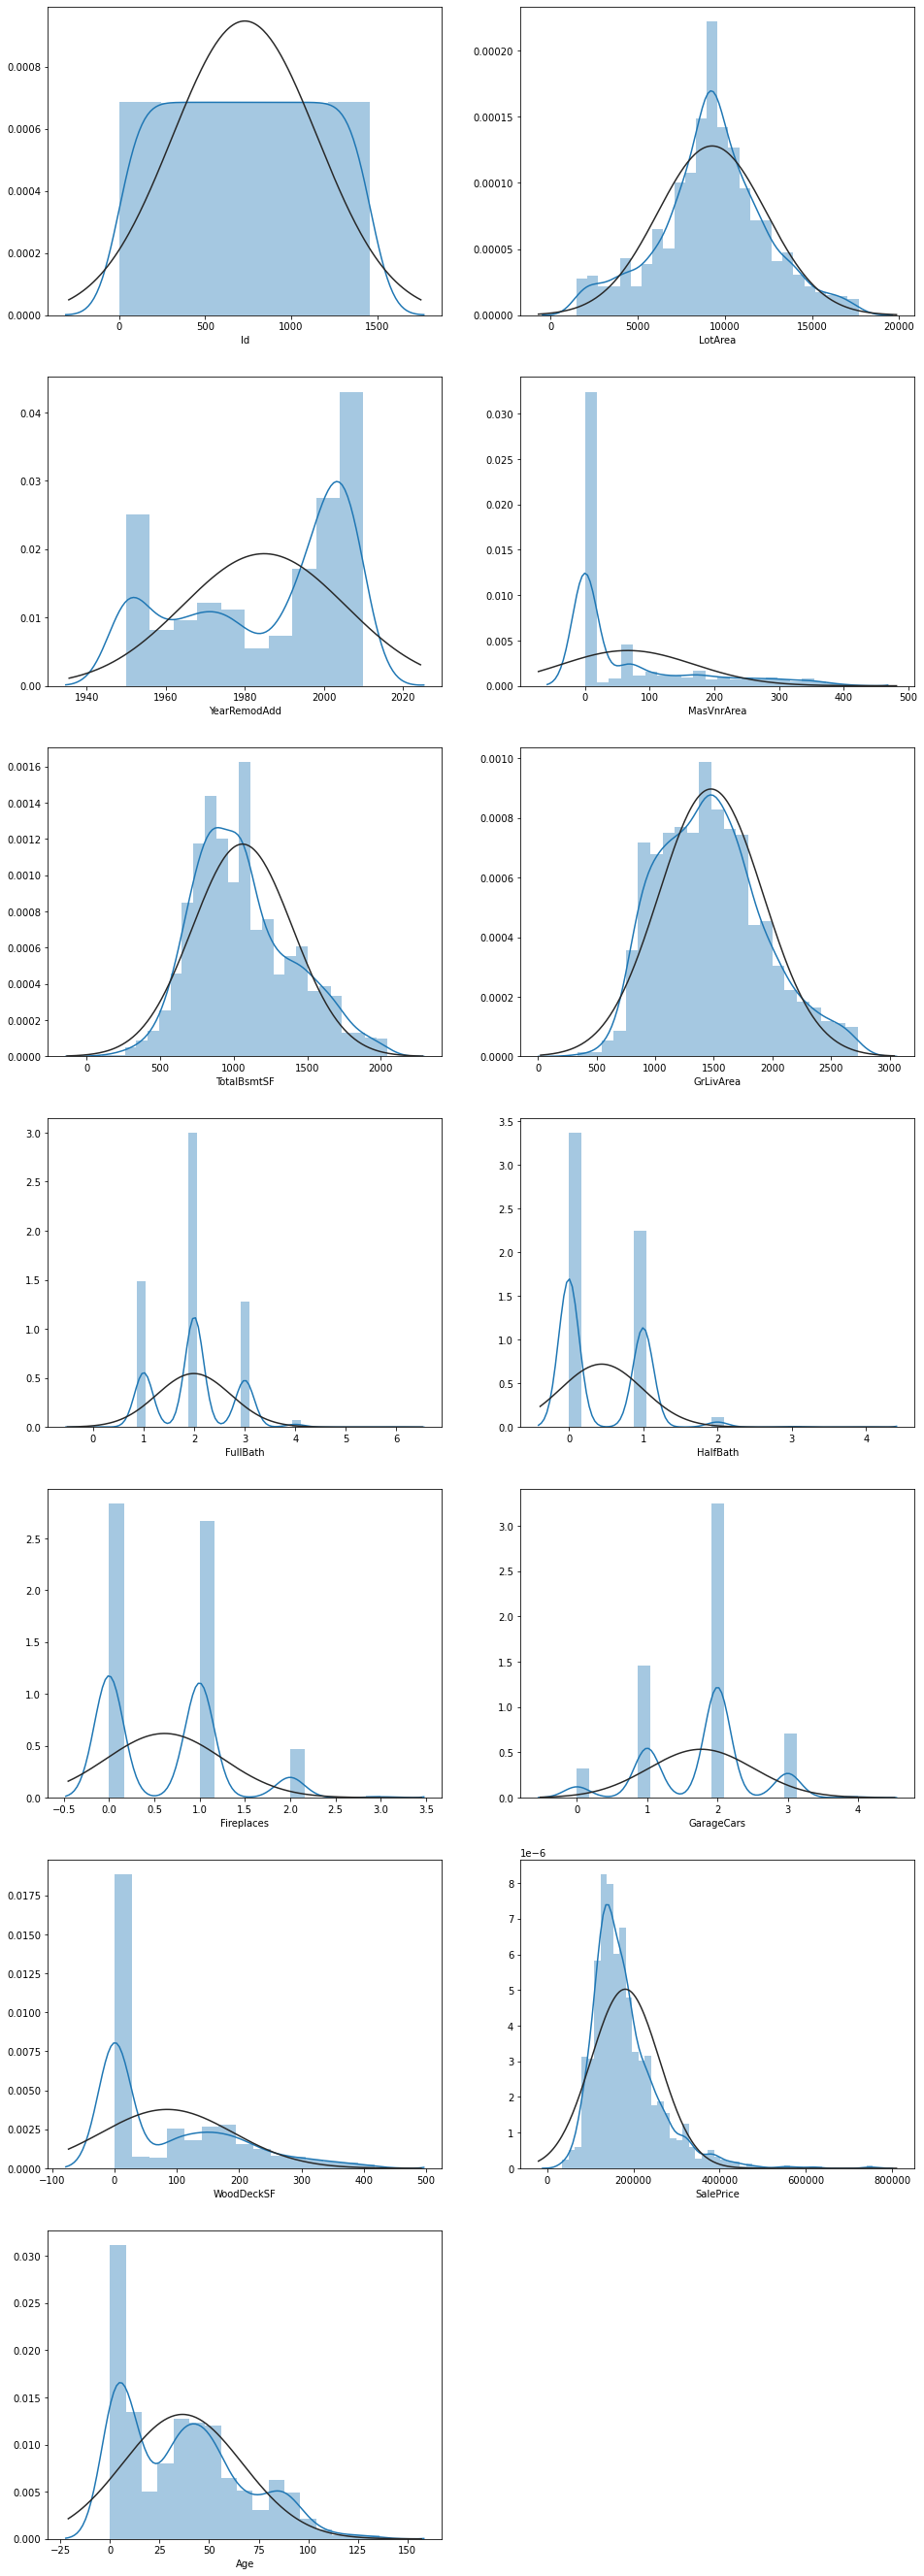

In [35]:
# plot histogram for every numerical feature to check the distribution
plt.figure(figsize=(16,48))
for i,j in zip(cnames,range(1,14)):
    plt.subplot(7,2,j)
    sns.distplot(train[i],fit=norm)

In [36]:
# SalePrice skewed towards right, get log of Saleprice & check distribution
train["LogSalePrice"]  = np.log(train["SalePrice"])

<AxesSubplot:xlabel='LogSalePrice'>

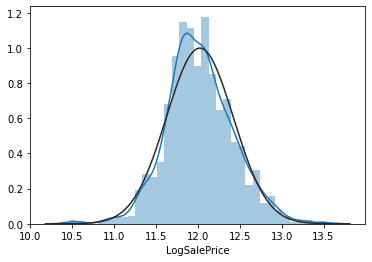

In [37]:
sns.distplot(train["LogSalePrice"],fit=norm)

### Categorical Features

In [38]:
cat_features = train.select_dtypes(exclude=["float","integer"]).columns
cat_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
ordinal_names=["MSSubClass", "MSZoning", "Utilities", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", 
               "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir","KitchenQual",
               "Functional", "FireplaceQu", "GarageFinish","GarageQual", "GarageCond"]

nominal_names=["Street", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2",
               "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", 
               "Heating", "Electrical", "GarageType", "PavedDrive", "SaleType", "SaleCondition"]

In [40]:
#for i,j in zip(ordinal_names,range(1,21)):
    #plt.figure(figsize=(16,80))
    #plt.subplot(20,1,j)
    #sns.swarmplot(train[i],train["SalePrice"])
               

In [41]:
# remove utilites as it have identical entries except one entry
train.drop("Utilities",axis=1,inplace=True)

In [42]:
# see data distribution of nominal features
for i in nominal_names:
    print(train[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
Artery       2

In [43]:
# these are the nominal features which have more than 80% identical names, so these columns should be remove
nominal_same = ["Street", "LandContour", "LandSlope", "Condition1", "Condition2", "BldgType", "RoofStyle", "RoofMatl",
               "Heating", "Electrical", "PavedDrive", "SaleType", "SaleCondition"]
train.drop(labels=nominal_same,axis=1,inplace=True)

### one hot encoding

In [137]:
train_copy=train.copy()
train_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'SalePrice', 'Age', 'LogSalePrice'],
      dtype='object')

In [138]:
from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()
dummy_ordinal = pd.DataFrame(oec.fit_transform(train[["MSZoning", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
                                         "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional",
                                         "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond"]]))

In [139]:
dummy_nominal = pd.get_dummies(train_copy[["LotShape", "LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd",
                                   "MasVnrType", "Foundation", "GarageType"]],drop_first=True)

In [140]:
dummy_ordinal.rename(columns={0:"MSZoning",1:"ExterQual",2:"ExterCond",3:"BsmtQual",4:"BsmtCond",5:"BsmtExposure", 
                              6:"BsmtFinType1",7:"BsmtFinType2",8:"HeatingQC",9:"CentralAir",10:"KitchenQual",
                              11:"Functional",12:"FireplaceQu",13:"GarageFinish",14:"GarageQual",15:"GarageCond"},inplace=True)

In [141]:
train_copy.drop(labels=["MSZoning", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                        "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional","FireplaceQu", "GarageFinish", 
                        "GarageQual", "GarageCond","LotShape", "LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", 
                        "Exterior2nd", "MasVnrType", "Foundation", "GarageType"],axis=1,inplace=True)

In [142]:
train_copy.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'SalePrice',
       'Age', 'LogSalePrice'],
      dtype='object')

In [143]:
dummy_nominal

,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1458,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [144]:
train_copy = pd.concat([train_copy,dummy_ordinal,dummy_nominal],axis=1)

In [145]:
train_copy.shape

(1460, 115)

In [146]:
train_copy.drop("SalePrice",axis=1,inplace=True)

In [147]:
#train_copy.drop("Id",axis=1,inplace=True)

In [148]:
train_copy.shape

(1460, 114)

## Model Building

### train_test_split

In [149]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [150]:
x = train_copy.drop("LogSalePrice",axis=1)
y= train_copy["LogSalePrice"]

In [151]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Linear Regression

In [152]:
# import linear regression model
from sklearn.linear_model import LinearRegression

# create and fit model
lr = LinearRegression().fit(x_train,y_train)

# prediction with Linear Regression
y_pred_lr = lr.predict(x_test)

## Model Evaluation

In [153]:
from sklearn.metrics import mean_squared_error,r2_score

In [154]:
r2 = r2_score(y_test,y_pred_lr)
mse = mean_squared_error(y_test,y_pred_lr)
rmse = np.sqrt(mse)

In [155]:
print(r2)
print(rmse)

0.8793412846828842
0.14307092061851012


# Prediction for test Dataset

## Data Preprocessing for test Dataset

In [156]:
# missing Value analysis
# missing value analysis for test dataset
missing_test= pd.DataFrame(test.isnull().sum()).reset_index()
missing_test = missing_test.rename(columns={"index":"variable_name",0:"missing_percentage"})
missing_test["missing_percentage"] = (missing_test["missing_percentage"]/len(test))*100
print(missing_test.sort_values(by="missing_percentage",ascending=False).head(35))

   variable_name  missing_percentage
72        PoolQC           99.794380
74   MiscFeature           96.504455
6          Alley           92.666210
73         Fence           80.123372
57   FireplaceQu           50.034270
3    LotFrontage           15.558602
59   GarageYrBlt            5.346127
63    GarageQual            5.346127
60  GarageFinish            5.346127
64    GarageCond            5.346127
58    GarageType            5.209047
31      BsmtCond            3.084304
30      BsmtQual            3.015764
32  BsmtExposure            3.015764
33  BsmtFinType1            2.878684
35  BsmtFinType2            2.878684
25    MasVnrType            1.096642
26    MasVnrArea            1.028101
2       MSZoning            0.274160
48  BsmtHalfBath            0.137080
9      Utilities            0.137080
55    Functional            0.137080
47  BsmtFullBath            0.137080
34    BsmtFinSF1            0.068540
36    BsmtFinSF2            0.068540
37     BsmtUnfSF            0.068540
5

In [157]:
test_copy=test.copy()

In [158]:
# remove all columns which don't have impact on sale price
test_copy.drop(labels=["PoolQC","MiscFeature","Alley","Fence",'LotFrontage','GarageArea','TotRmsAbvGrd','BsmtFinSF1',
                       'BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BedroomAbvGr','KitchenAbvGr',
                       'OpenPorchSF','GarageYrBlt','GarageArea','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                       'MiscVal','MoSold',"Utilities","Street", "LandContour", "LandSlope", "Condition1", "Condition2",
                       "BldgType", "RoofStyle", "RoofMatl", "Heating", "Electrical", "PavedDrive", "SaleType", 
                       "SaleCondition"],axis=1,inplace=True)

In [159]:
test_copy.shape

(1459, 43)

In [160]:
# missing value analysis for test dataset
missing_test= pd.DataFrame(test_copy.isnull().sum()).reset_index()
missing_test = missing_test.rename(columns={"index":"variable_name",0:"missing_percentage"})
missing_test["missing_percentage"] = (missing_test["missing_percentage"]/len(test))*100
print(missing_test.sort_values(by="missing_percentage",ascending=False).head(22))

   variable_name  missing_percentage
35   FireplaceQu           50.034270
40    GarageCond            5.346127
39    GarageQual            5.346127
37  GarageFinish            5.346127
36    GarageType            5.209047
20      BsmtCond            3.084304
21  BsmtExposure            3.015764
19      BsmtQual            3.015764
23  BsmtFinType2            2.878684
22  BsmtFinType1            2.878684
14    MasVnrType            1.096642
15    MasVnrArea            1.028101
2       MSZoning            0.274160
29  BsmtHalfBath            0.137080
28  BsmtFullBath            0.137080
33    Functional            0.137080
32   KitchenQual            0.068540
12   Exterior1st            0.068540
38    GarageCars            0.068540
24   TotalBsmtSF            0.068540
13   Exterior2nd            0.068540
27     GrLivArea            0.000000


In [161]:
# missing value imputation for remaining features
missing_none=["FireplaceQu","GarageCond","GarageType","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtCond",
             "BsmtQual","BsmtFinType1","MasVnrType"]

missing_mode=  ["MasVnrArea","BsmtHalfBath","BsmtFullBath","GarageCars","TotalBsmtSF","KitchenQual","Functional","MSZoning",
            "Exterior1st","Exterior2nd"]

In [162]:
# fill na values with none in categorical variable
for i in missing_none:
    test_copy[i].fillna("none",inplace=True)

In [163]:
# fill with 0 in MasVnrArea correspond MasVnrType
test_copy["MasVnrArea"].fillna(0,inplace=True)

# fillna with mode for remaining features
test_copy["BsmtHalfBath"].fillna((test_copy["BsmtHalfBath"].mode()),inplace=True)

In [164]:
# print mode of all remaining features
print("BsmtHalfBath")
print(test_copy["BsmtHalfBath"].mode())
print("BsmtFullBath")
print(test_copy["BsmtFullBath"].mode())
print("GarageCars")
print(test_copy["GarageCars"].mode())
print("TotalBsmtSF")
print(test_copy["TotalBsmtSF"].mode())
print("KitchenQual")
print(test_copy["KitchenQual"].mode())
print("Functional")
print(test_copy["Functional"].mode())
print("MSZoning")
print(test_copy["MSZoning"].mode())
print("Exterior1st")
print(test_copy["Exterior1st"].mode())
print("Exterior2nd")
print(test_copy["Exterior2nd"].mode())


BsmtHalfBath
0    0.0
dtype: float64
BsmtFullBath
0    0.0
dtype: float64
GarageCars
0    2.0
dtype: float64
TotalBsmtSF
0    0.0
dtype: float64
KitchenQual
0    TA
dtype: object
Functional
0    Typ
dtype: object
MSZoning
0    RL
dtype: object
Exterior1st
0    VinylSd
dtype: object
Exterior2nd
0    VinylSd
dtype: object


In [165]:
test_copy["BsmtHalfBath"].fillna(0,inplace=True)
test_copy["BsmtFullBath"].fillna(0,inplace=True)
test_copy["GarageCars"].fillna(2,inplace=True)
test_copy["TotalBsmtSF"].fillna(0,inplace=True)
test_copy["KitchenQual"].fillna("TA",inplace=True)
test_copy["Functional"].fillna("Typ",inplace=True)
test_copy["MSZoning"].fillna("RL",inplace=True)
test_copy["Exterior1st"].fillna("VinylSd",inplace=True)
test_copy["Exterior2nd"].fillna("VinylSd",inplace=True)

### Outlier Analysis

In [166]:
#first of all select numerical features for outlier detection
numerical_features_test= test_copy.select_dtypes(include=["float","integer"]).columns
numerical_features_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'YrSold'],
      dtype='object')

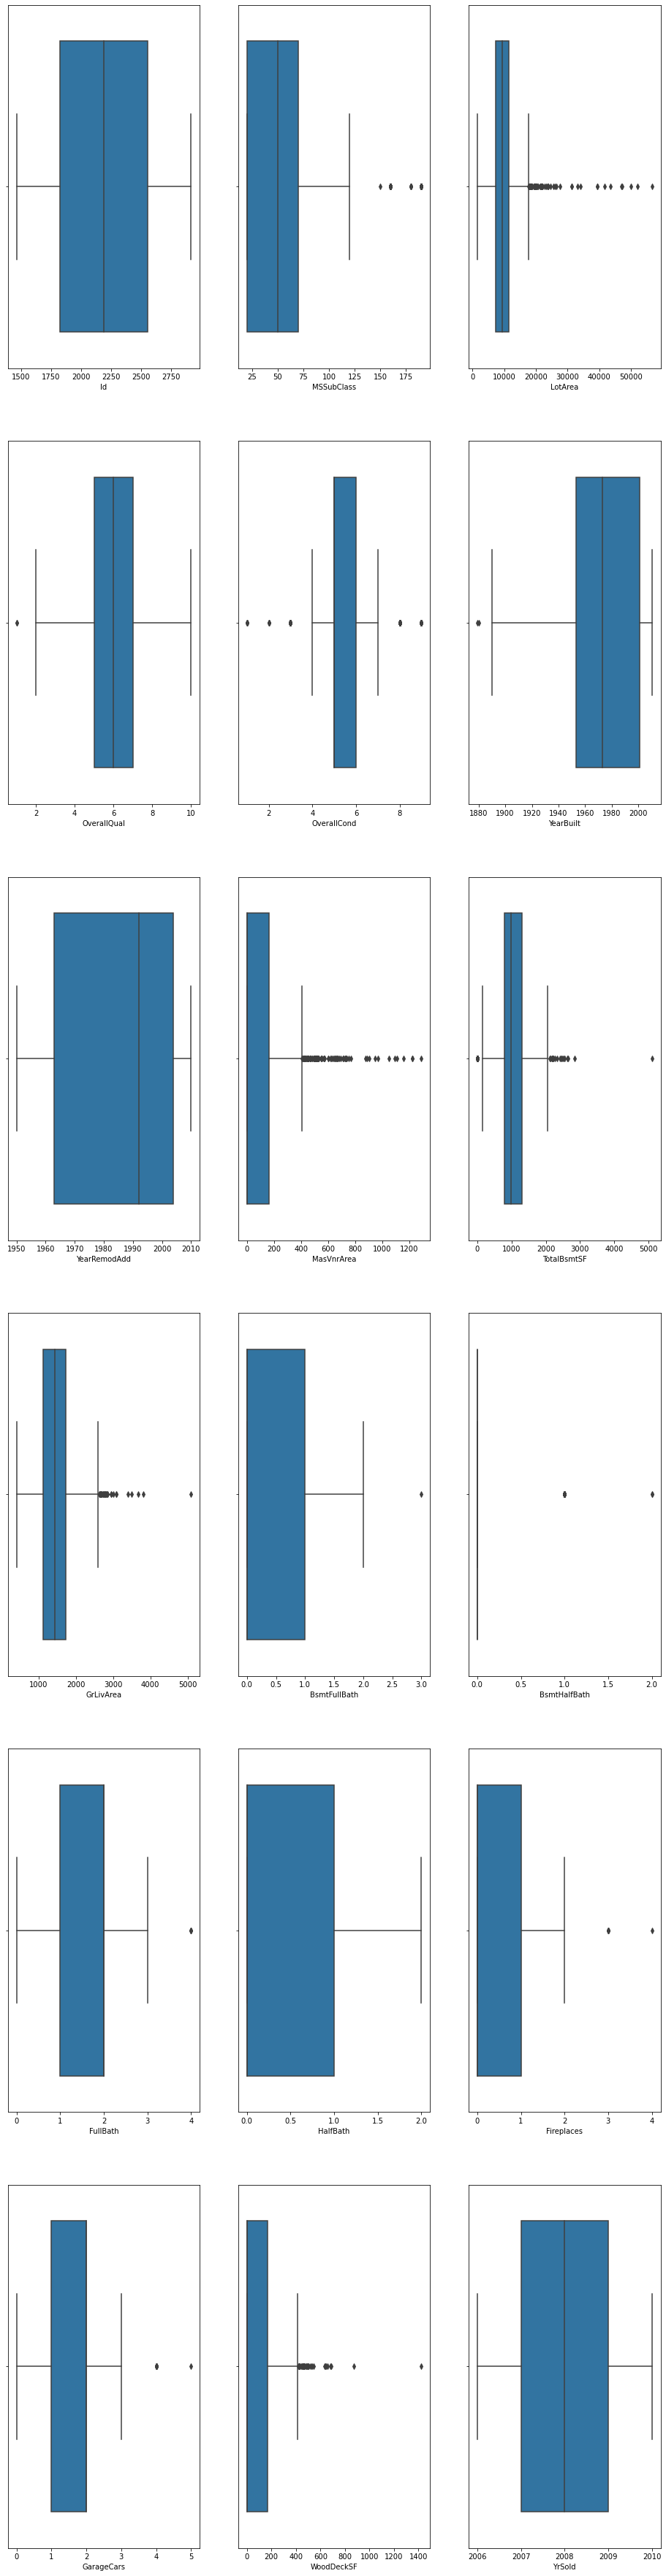

In [167]:
plt.figure(figsize=(16,64))
for i,j in zip(numerical_features_test,range(1,19)):
    plt.subplot(6,3,j)
    sns.boxplot(test_copy[i])

In [168]:
# filter out continuos variable with outliers
cnames_outliers = ["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea", "WoodDeckSF"]

In [169]:
# create loop to determine the outliers
for i in cnames_outliers:
    q1,q3 = np.percentile(test_copy[i],[25,75])
    iqr = q3-q1
    min_q = q1-1.5*iqr
    max_q = q3+1.5*iqr
    #print(i)
    #print(min_q)
    #print(max_q)
    test_copy.loc[(test_copy[i]<min_q)|(test_copy[i]>max_q),[i]]=np.nan

In [170]:
# missing Value analysis
# missing value analysis for test dataset
missing_test= pd.DataFrame(test_copy.isnull().sum()).reset_index()
missing_test = missing_test.rename(columns={"index":"variable_name",0:"missing_percentage"})
missing_test["missing_percentage"] = (missing_test["missing_percentage"]/len(test))*100
print(missing_test.sort_values(by="missing_percentage",ascending=False).head())

   variable_name  missing_percentage
15    MasVnrArea            7.128170
24   TotalBsmtSF            4.249486
3        LotArea            4.112406
27     GrLivArea            3.015764
41    WoodDeckSF            2.398903


In [171]:
test_copy.fillna(test_copy.mean(),inplace=True)

In [172]:
test_copy.shape

(1459, 43)

In [173]:
# feature Engineering
# convert data types of respective features
test_copy["MSSubClass"]    = test_copy["MSSubClass"].astype("category")
test_copy["OverallQual"]   = test_copy["OverallQual"].astype("category")
test_copy["OverallCond"]   = test_copy["OverallCond"].astype("category")

In [174]:
test_copy["Age"]=test_copy["YrSold"]-test_copy["YearBuilt"]

# remove YearBuilt and YrSold
test_copy.drop(["YearBuilt","YrSold"],axis=1,inplace=True)


test_copy["FullBath"] = test_copy["BsmtFullBath"] + test_copy["FullBath"]
test_copy["HalfBath"] = test_copy["BsmtHalfBath"] + test_copy["HalfBath"]

# remove BsmtHalfBath and BsmtFullBath
test_copy.drop(["BsmtFullBath","BsmtHalfBath"],axis=1,inplace=True)

In [175]:
test_copy.shape

(1459, 40)

### one hot encoding for test dataset

In [176]:
cat_features = test_copy.select_dtypes(exclude=["float","integer"]).columns
cat_features

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [177]:
from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()
dummy_ordinal_test = pd.DataFrame(oec.fit_transform(test_copy[["MSZoning", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
                                         "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional",
                                         "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond"]]))

In [178]:
dummy_ordinal_test.rename(columns={0:"MSZoning",1:"ExterQual",2:"ExterCond",3:"BsmtQual",4:"BsmtCond",5:"BsmtExposure", 
                              6:"BsmtFinType1",7:"BsmtFinType2",8:"HeatingQC",9:"CentralAir",10:"KitchenQual",
                              11:"Functional",12:"FireplaceQu",13:"GarageFinish",14:"GarageQual",15:"GarageCond"},inplace=True)

In [179]:
dummy_nominal_test = pd.get_dummies(test_copy[["LotShape", "LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd",
                                   "MasVnrType", "Foundation", "GarageType"]],drop_first=True)

In [180]:
test_copy.drop(labels=["MSZoning", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                        "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional","FireplaceQu", "GarageFinish", 
                        "GarageQual", "GarageCond","LotShape", "LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", 
                        "Exterior2nd", "MasVnrType", "Foundation", "GarageType"],axis=1,inplace=True)

In [181]:
test_copy = pd.concat([test_copy,dummy_ordinal_test,dummy_nominal_test],axis=1)

In [182]:
test_copy.he

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageCars,WoodDeckSF,Age,MSZoning,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none
0,1461,20,11622.0,5,6,1961,0.0,882.0,896.0,1.0,0.0,0,1.0,140.0,49,2.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,1.0,3.0,6.0,5.0,2.0,3.0,4.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1462,20,14267.0,6,6,1958,108.0,1329.0,1329.0,1.0,1.0,0,1.0,393.0,52,3.0,3.0,4.0,3.0,3.0,3.0,0.0,5.0,4.0,1.0,2.0,6.0,5.0,2.0,3.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1463,60,13830.0,5,5,1998,0.0,928.0,1629.0,2.0,1.0,1,2.0,212.0,13,3.0,3.0,4.0,2.0,3.0,3.0,2.0,5.0,2.0,1.0,3.0,6.0,4.0,0.0,3.0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1464,60,9978.0,6,6,1998,20.0,926.0,1604.0,2.0,1.0,1,2.0,360.0,12,3.0,3.0,4.0,3.0,3.0,3.0,2.0,5.0,0.0,1.0,2.0,6.0,2.0,0.0,3.0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1465,120,5005.0,8,5,1992,0.0,1280.0,1280.0,2.0,0.0,0,2.0,0.0,18,3.0,2.0,4.0,2.0,3.0,3.0,0.0,5.0,0.0,1.0,2.0,6.0,5.0,1.0,3.0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [183]:
test_copy["HouseStyle_2.5Fin"]=0
test_copy["Exterior1st_ImStucc"]=0
test_copy["Exterior1st_Stone"]=0
test_copy["Exterior2nd_Other"]=0

In [184]:
test_copy.shape

(1459, 113)

In [185]:
# prediction for test dataset
test_pred=lr.predict(test_copy)

In [190]:
test_pred=pd.DataFrame(test_pred).reset_index().rename(columns={0:"LogSalePrice"})

In [191]:
test_pred

,index,LogSalePrice
0,0,11.503468
1,1,11.988435
2,2,12.065097
3,3,12.106530
4,4,12.288673
...,...,...
1454,1454,11.313829
1455,1455,11.098670
1456,1456,11.914973
1457,1457,11.733765


In [196]:
test_pred["SalePrice"]=round(np.exp(test_pred["LogSalePrice"]))

In [197]:
test_pred

,index,LogSalePrice,SalePrice
0,0,11.503468,99059.0
1,1,11.988435,160883.0
2,2,12.065097,173702.0
3,3,12.106530,181050.0
4,4,12.288673,217221.0
...,...,...,...
1454,1454,11.313829,81947.0
1455,1455,11.098670,66083.0
1456,1456,11.914973,149488.0
1457,1457,11.733765,124712.0


In [198]:
test_submission=pd.concat([test["Id"],test_pred["SalePrice"]],axis=1)

In [199]:
test_submission

,Id,SalePrice
0,1461,99059.0
1,1462,160883.0
2,1463,173702.0
3,1464,181050.0
4,1465,217221.0
...,...,...
1454,2915,81947.0
1455,2916,66083.0
1456,2917,149488.0
1457,2918,124712.0


In [200]:
test_submission.to_csv("test_submission.csv")